In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
from sklearn.preprocessing import LabelEncoder
#Read and add target column
df = pd.read_csv('df_6dB_pump_fe_ta.csv')

In [43]:
df.head()

,mfccs0,mfccs1,mfccs2,mfccs3,mfccs4,mfccs5,mfccs6,mfccs7,mfccs8,mfccs9,...,delta2_mfccs4,delta2_mfccs5,delta2_mfccs6,delta2_mfccs7,delta2_mfccs8,delta2_mfccs9,delta2_mfccs10,delta2_mfccs11,delta2_mfccs12,target
0,-405.86188,152.76860,-74.52950,62.734150,-44.739450,47.361115,-23.117369,27.913315,-14.657843,5.387503,...,-23.171936,7.110873,-4.307709,2.141509,-1.571859,-1.571859,-1.571859,-1.571859,-1.571859,normal
1,-405.69257,151.58089,-74.30310,61.144775,-43.903812,44.871080,-22.432236,26.454416,-13.038487,8.177551,...,-23.005482,7.340569,-4.154306,1.906900,-1.791369,-1.791369,-1.791369,-1.791369,-1.791369,normal
2,-398.59280,145.81995,-81.03869,56.707012,-49.122260,36.722343,-30.608640,22.128532,-14.495670,5.461157,...,-21.869076,7.700053,-3.839507,2.206204,-1.863269,-1.863269,-1.863269,-1.863269,-1.863269,normal
3,-404.55270,152.83186,-72.84279,66.303690,-42.953503,45.730520,-26.300179,27.969782,-13.734242,6.439921,...,-23.157557,7.277241,-3.974979,2.407441,-1.554637,-1.554637,-1.554637,-1.554637,-1.554637,normal
4,-409.14900,151.14287,-76.30834,59.437164,-50.093975,40.913765,-27.727530,26.517015,-15.732157,4.814447,...,-22.781065,7.661425,-4.071600,2.039358,-1.784925,-1.784925,-1.784925,-1.784925,-1.784925,normal


In [44]:
df.target.value_counts()

normal      456
abnormal    456
Name: target, dtype: int64

In [45]:
# label encode target
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])

In [46]:
df.target.value_counts()

1    456
0    456
Name: target, dtype: int64

target            1.000000
mfccs7            0.448870
mfccs8            0.396706
delta_mfccs4      0.376080
delta_mfccs3      0.376080
delta_mfccs2      0.376080
delta_mfccs1      0.376080
delta_mfccs0      0.376080
mfccs5            0.285298
mfccs3            0.275767
delta_mfccs5      0.235282
mfccs12           0.197474
mfccs9            0.176066
mfccs6           -0.001402
delta_mfccs6     -0.052682
delta2_mfccs7    -0.089473
mfccs2           -0.095820
mfccs4           -0.118218
mfccs11          -0.144638
mfccs1           -0.150816
delta_mfccs9     -0.209642
delta_mfccs10    -0.209642
delta_mfccs11    -0.209642
delta_mfccs12    -0.209642
delta_mfccs8     -0.209642
delta2_mfccs5    -0.220044
mfccs0           -0.230519
delta2_mfccs1    -0.253121
delta2_mfccs2    -0.253121
delta2_mfccs3    -0.253121
delta2_mfccs4    -0.253121
delta2_mfccs0    -0.253121
delta2_mfccs8    -0.282315
delta2_mfccs9    -0.282315
delta2_mfccs10   -0.282315
delta2_mfccs11   -0.282315
delta2_mfccs12   -0.282315
m

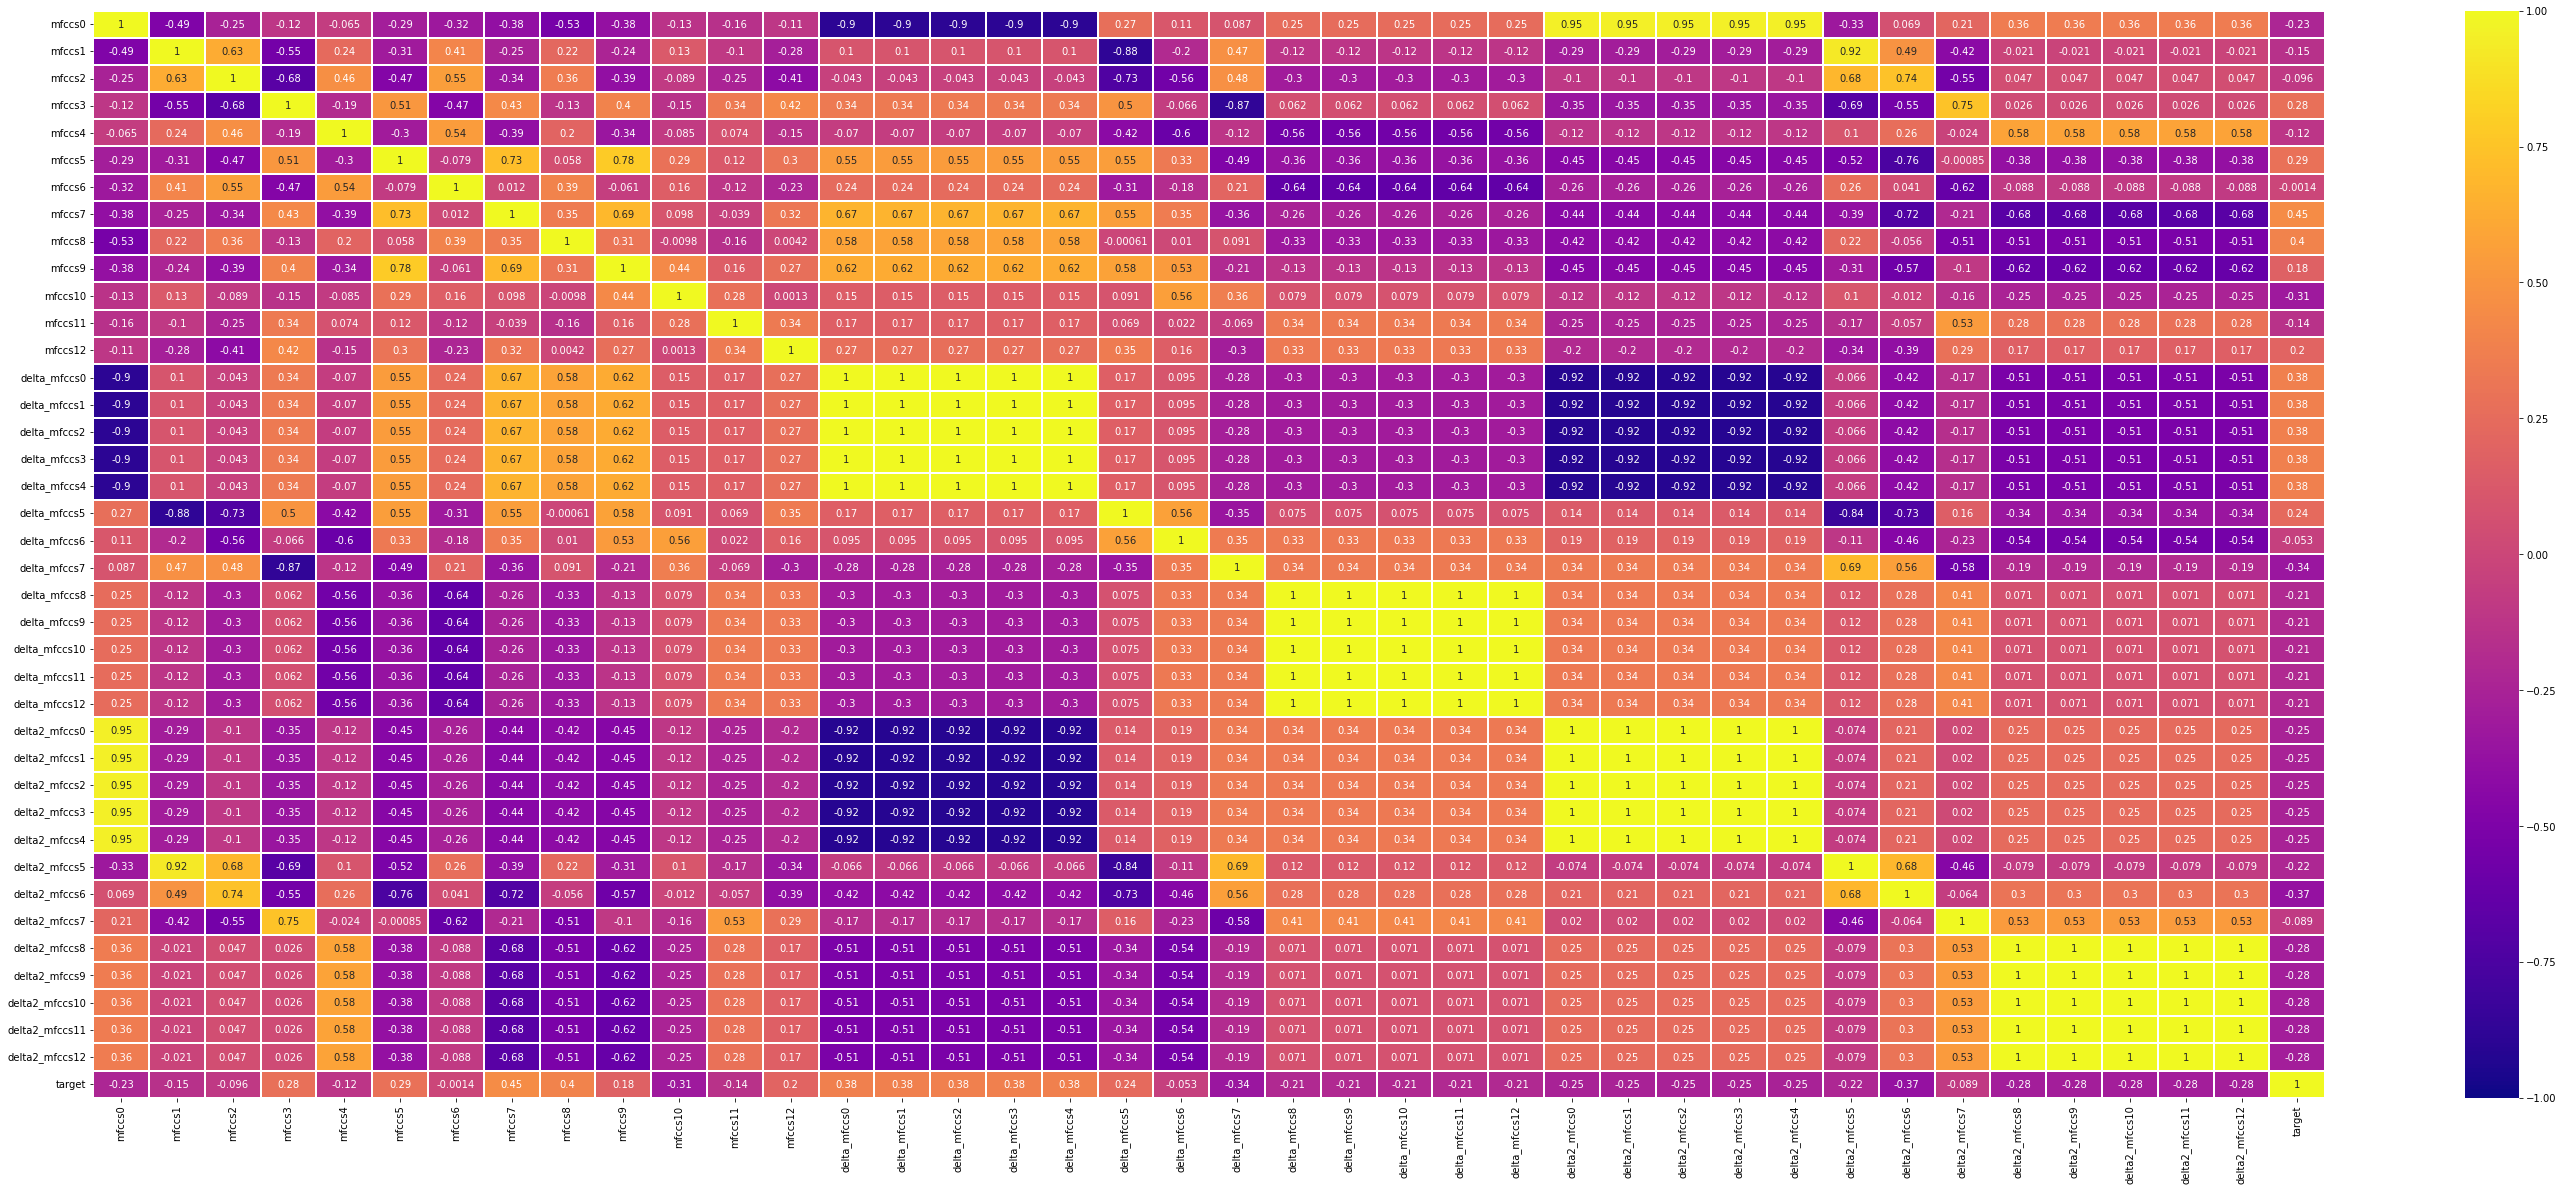

In [50]:
#EDA
correlation = df.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(correlation, annot=True, linewidths=0.1, vmin=-1, cmap="plasma")
correlation['target'].sort_values(ascending=False)
#Feature engineeing delta and delta2

In [51]:
X = df.drop(['target'],axis=1)
# X = df['features']
y = df.target

#Normalise X
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

X

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.574038,0.374216,0.326633,0.479588,0.527149,0.657463,0.428436,0.621429,0.442300,0.450453,...,0.479837,0.479837,0.283285,0.151611,0.408102,0.572568,0.572568,0.572568,0.572568,0.572568
1,0.574780,0.363622,0.329536,0.460700,0.543832,0.617783,0.443872,0.584371,0.485983,0.540320,...,0.491562,0.491562,0.310529,0.184153,0.375935,0.522394,0.522394,0.522394,0.522394,0.522394
2,0.605890,0.312233,0.243193,0.407964,0.439651,0.487929,0.259665,0.474489,0.446675,0.452825,...,0.571611,0.571611,0.353167,0.250932,0.416972,0.505959,0.505959,0.505959,0.505959,0.505959
3,0.579775,0.374781,0.348255,0.522007,0.562804,0.631479,0.356730,0.622863,0.467215,0.484351,...,0.480850,0.480850,0.303018,0.222194,0.444563,0.576505,0.576505,0.576505,0.576505,0.576505
4,0.559634,0.359714,0.303831,0.440408,0.420252,0.554722,0.324574,0.585961,0.413320,0.431995,...,0.507370,0.507370,0.348585,0.201698,0.394096,0.523867,0.523867,0.523867,0.523867,0.523867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.226967,0.743602,0.900480,0.086312,0.544637,0.397446,0.507685,0.161691,0.400032,0.610277,...,0.226392,0.226392,0.864007,1.000000,0.277190,0.559091,0.559091,0.559091,0.559091,0.559091
908,0.250203,0.792227,0.748325,0.085888,0.477503,0.513751,0.352523,0.352567,0.418548,0.457639,...,0.280106,0.280106,0.840929,0.722604,0.275759,0.600774,0.600774,0.600774,0.600774,0.600774
909,0.202899,0.934989,0.671241,0.189266,0.791719,0.348592,0.644405,0.109126,0.553635,0.353867,...,0.210103,0.210103,0.860805,0.658714,0.324934,0.660913,0.660913,0.660913,0.660913,0.660913
910,0.212045,0.922612,0.652770,0.205850,0.754442,0.397813,0.618316,0.118398,0.535892,0.382605,...,0.212355,0.212355,0.847201,0.647956,0.340310,0.679028,0.679028,0.679028,0.679028,0.679028


In [52]:
#split training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

#models
rfc = RandomForestClassifier(n_estimators= 50)
lr = LogisticRegression(solver='lbfgs')
knn = KNeighborsClassifier(n_neighbors=3)

model = rfc

#Train the model
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

Best Threshold=0.440000, G-Mean=0.994


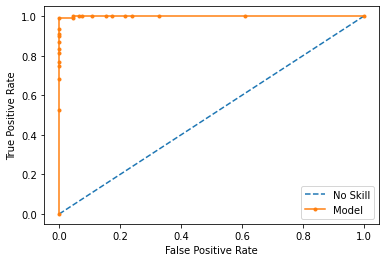

In [53]:
from numpy import sqrt
from numpy import argmax

'''Reference https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/'''

# predict probabilities
lr_probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))



# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()